<a href="https://colab.research.google.com/github/RenataKostolina/Machine_learning/blob/main/salary_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Описание ДЗ

Это ДЗ по классическому ML.

Цель — предсказать по предоставленным данным зарплату человека*.

Весь датасет находится в том же архиве, что и этот ноутбук, в папке "data_hw1". Альтернативно данные можно скачать [здесь](https://archive.ics.uci.edu/dataset/20/census+income).

*Здесь точная величина зарплаты не дана. Вместо этого ЗП поделена на два класса: '<=50K' и '>50K'. Поэтому нужно решать не задачу регрессии, а задачу бинарной классификации.

### Базовое описание данных

В файлах adult.names указана общая информация о наборе данных. Рекомендую с ней ознакомиться.

Разделение train/test уже сделано авторами датасета. Соответствующие данные лежат в [adult.data](./data_hw1/adult.data) и [adult.test](./data_hw1/adult.test). Именно с ними вам предстоит работать. Ни в коем случае не смешивайте эти два датасета!

#  Подготовка

In [ ]:
!gdown 1t_juvoRgEu_chZa9eSuyukL-6vrusSbz # test dataset
!gdown 1QcZ0ANp1qKf4TEpRNXZabNSVCGCIqNdP # train dataset

Downloading...
From: https://drive.google.com/uc?id=1t_juvoRgEu_chZa9eSuyukL-6vrusSbz
To: /content/adult.test
100% 2.00M/2.00M [00:00<00:00, 109MB/s]
Downloading...
From: https://drive.google.com/uc?id=1QcZ0ANp1qKf4TEpRNXZabNSVCGCIqNdP
To: /content/adult.data
100% 3.97M/3.97M [00:00<00:00, 76.4MB/s]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data_columns = [
    "age",
    "workclass",
    "fnlwgt",
    "education",
    "education num",
    "marital status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "capital gain",
    "capital loss",
    "hours per week",
    "country",
    "salary"
]

In [ ]:
""" country = {
    'Cuba': [' Cuba'],
    'American Islands': [' Puerto-Rico', ' Jamaica', ' Trinadad&Tobago', ' Haiti'],
    'Poor American Islands': [' Dominican-Republic', ' Outlying-US(Guam-USVI-etc)'],
    'Canada': [' Canada'],
    'United States': [' United-States'],
    'North America': [' Honduras', ' Guatemala', ' El-Salvador', ' Nicaragua', ' Mexico'],
    'South America': [' Columbia', ' Peru'],
    'Europe': [' Germany', ' Italy', ' Poland', ' Portugal', ' France', ' Yugoslavia', ' England', ' Greece', ' Hungary', ' Ireland', ' Holand-Netherlands', ' Scotland'],
    'Asia': [' China', ' India', ' Japan', ' Laos', ' Philippines', ' Taiwan', ' Thailand', ' Vietnam', ' Cambodia', ' Hong', ' Iran', ' South'],
    'Not Defined Country': [' ?']
}"""

" country = {\n    'Cuba': [' Cuba'],\n    'American Islands': [' Puerto-Rico', ' Jamaica', ' Trinadad&Tobago', ' Haiti'],\n    'Poor American Islands': [' Dominican-Republic', ' Outlying-US(Guam-USVI-etc)'],\n    'Canada': [' Canada'],\n    'United States': [' United-States'],\n    'North America': [' Honduras', ' Guatemala', ' El-Salvador', ' Nicaragua', ' Mexico'],\n    'South America': [' Columbia', ' Peru'],\n    'Europe': [' Germany', ' Italy', ' Poland', ' Portugal', ' France', ' Yugoslavia', ' England', ' Greece', ' Hungary', ' Ireland', ' Holand-Netherlands', ' Scotland'],\n    'Asia': [' China', ' India', ' Japan', ' Laos', ' Philippines', ' Taiwan', ' Thailand', ' Vietnam', ' Cambodia', ' Hong', ' Iran', ' South'],\n    'Not Defined Country': [' ?']\n}"

In [ ]:
country_rate = {
    'first': [' Dominican-Republic', ' Columbia', ' Guatemala', ' Mexico', ' Nicaragua', ' Outlying-US(Guam-USVI-etc)', ' Holand-Netherlands'],
    'second': [' Peru', ' Vietnam', ' Honduras', ' El-Salvador', ' Haiti'],
    'third': [' Trinadad&Tobago', ' Puerto-Rico', ' Portugal', ' Laos', ' Jamaica', ' Ecuador'],
    'fourth': [' Thailand', ' South', ' Poland', ' Ireland'],
    'fifth': [' Hungary', ' United-States', ' Scotland', ' ?'],
    'sixth': [' Cuba', ' China', ' Greece', ' Hong', ' Philippines'],
    'seventh': [' Germany', ' Canada', ' England', ' Italy'],
    'eighth': [' Cambodia', ' Yugoslavia', ' Japan', ' Taiwan'],
    'ninth': [' India', ' France', ' Iran']
}

In [ ]:
education = {
    'School': [' 1st-4th', ' 5th-6th', ' 7th-8th', ' 9th', ' 10th', ' 11th', ' 12th'],
    'HS_grad': [' HS-grad'],
    'College': [' Some-college'],
    'Bachelors': [' Bachelors'],
    'Masters': [' Masters'],
    'Assoc_voc': [' Assoc-voc'],
    'Assoc_acdm': [' Assoc-acdm'],
    'Prof_school': [' Prof-school'],
    'Doctorate': [' Doctorate'],
    'Preschool': [' Preschool']
}

In [ ]:
workclass = {
    'Private': [' Private'],
    'Self Employed': [' Self-emp-not-inc', ' Self-emp-inc'],
    'Government': [' Federal-gov', ' Local-gov', ' State-gov'],
    'Free': [' Without-pay'],
    'Workless': [' Never-worked'],
    'Not Defined Work': [' ?']
}

# data

In [ ]:
data = pd.read_csv("/content/adult.data", names=data_columns)

In [ ]:
data.drop(columns=['fnlwgt', 'education num', 'marital status'], inplace=True)

In [ ]:
for key in country_rate.keys():
  data['country'] = data['country'].replace(country_rate[key], key)

In [ ]:
for key in education.keys():
  data['education'] = data['education'].replace(education[key], key)

In [ ]:
data.loc[data['sex'] == ' Male', 'sex'] = 0
data.loc[data['sex'] == ' Female', 'sex'] = 1

In [ ]:
data.loc[data['relationship'] == ' Husband', 'relationship'] = 'Married'
data.loc[data['relationship'] == ' Wife', 'relationship'] = 'Married'
data.loc[data['relationship'] == ' Not-in-family', 'relationship'] = 'Unmarried'
data.loc[data['relationship'] == ' Unmarried', 'relationship'] = 'Unmarried'
data.loc[data['relationship'] == ' Own-child', 'relationship'] = 'Child'

In [ ]:
for key in workclass.keys():
  data['workclass'] = data['workclass'].replace(workclass[key], key)

In [ ]:
data.loc[data['age'] <= 12, 'mature'] = 'Child'
data.loc[(12 < data['age'])&(data['age'] <= 18), 'mature'] = 'Teenager'
data.loc[(18 < data['age'])&(data['age'] <= 24), 'mature'] = 'Young Adult'
data.loc[(24 < data['age'])&(data['age'] <= 40), 'mature'] = 'Adult'
data.loc[(40 < data['age'])&(data['age'] <= 55), 'mature'] = 'Middle'
data.loc[(55 < data['age'])&(data['age'] <= 65), 'mature'] = 'Senior'
data.loc[65 < data['age'], 'mature'] = 'Elderly'

In [ ]:
data.drop(columns=['age'], inplace=True)

In [ ]:
data.loc[data['salary'] == ' <=50K', 'salary'] = 0
data.loc[data['salary'] == ' >50K', 'salary'] = 1

In [ ]:
data.loc[data['occupation'] == ' ?', 'occupation'] = 'Not-defined'

# test

In [ ]:
test = pd.read_csv("/content/adult.test", names=data_columns, skiprows=1)

In [ ]:
test.drop(columns=['fnlwgt', 'education num', 'marital status'], inplace=True)

In [ ]:
for key in country_rate.keys():
  test['country'] = test['country'].replace(country_rate[key], key)

In [ ]:
for key in education.keys():
  test['education'] = test['education'].replace(education[key], key)

In [ ]:
test.loc[test['sex'] == ' Male', 'sex'] = 0
test.loc[test['sex'] == ' Female', 'sex'] = 1

In [ ]:
test.loc[test['relationship'] == ' Husband', 'relationship'] = 'Married'
test.loc[test['relationship'] == ' Wife', 'relationship'] = 'Married'
test.loc[test['relationship'] == ' Not-in-family', 'relationship'] = 'Unmarried'
test.loc[test['relationship'] == ' Unmarried', 'relationship'] = 'Unmarried'
test.loc[test['relationship'] == ' Own-child', 'relationship'] = 'Child'

In [ ]:
for key in workclass.keys():
  test['workclass'] = test['workclass'].replace(workclass[key], key)

In [ ]:
test.loc[test['age'] <= 12, 'mature'] = 'Child'
test.loc[(12 < test['age'])&(test['age'] <= 18), 'mature'] = 'Teenager'
test.loc[(18 < test['age'])&(test['age'] <= 24), 'mature'] = 'Young Adult'
test.loc[(24 < test['age'])&(test['age'] <= 40), 'mature'] = 'Adult'
test.loc[(40 < test['age'])&(test['age'] <= 55), 'mature'] = 'Middle'
test.loc[(55 < test['age'])&(test['age'] <= 65), 'mature'] = 'Senior'
test.loc[65 < test['age'], 'mature'] = 'Elderly'

In [ ]:
test.drop(columns=['age'], inplace=True)

In [ ]:
test.loc[test['salary'] == ' <=50K.', 'salary'] = 0
test.loc[test['salary'] == ' >50K.', 'salary'] = 1

In [ ]:
test.loc[test['occupation'] == ' ?', 'occupation'] = 'Not-defined'

### Опциональный EDA

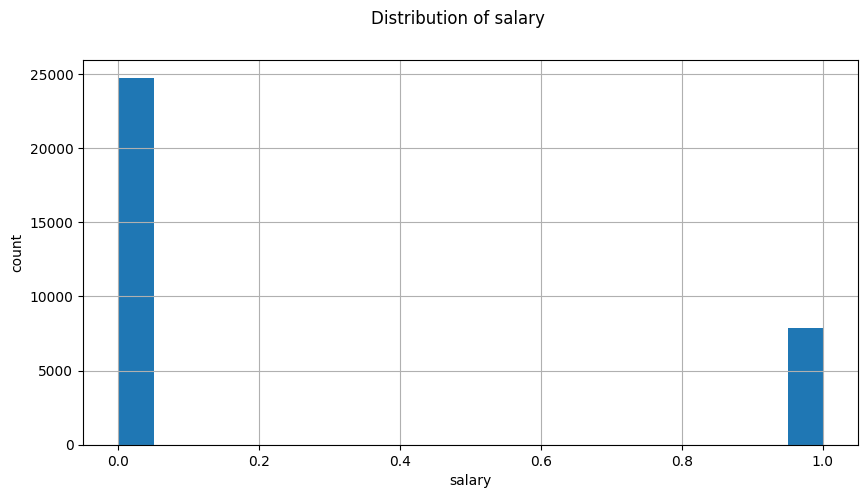

In [ ]:
plt.figure(figsize = (10, 5))

data['salary'].hist(density=False, bins=20)
plt.ylabel('count')
plt.xlabel('salary')

plt.suptitle('Distribution of salary')
plt.show()

Мы видим, что значения распределены не совсем ровно, датасет несбалансирован. Целевая переменная является качественными данными (то есть категориальной переменной).

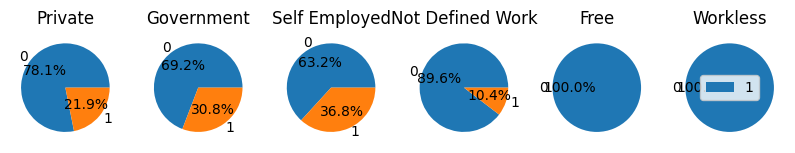

In [ ]:
# Готовим данные для графика
data1 = data[data['workclass'] == 'Private']['salary'].value_counts()
data2 = data[data['workclass'] == 'Government']['salary'].value_counts()
data3 = data[data['workclass'] == 'Self Employed']['salary'].value_counts()
data4 = data[data['workclass'] == 'Not Defined Work']['salary'].value_counts()
data5 = data[data['workclass'] == 'Free']['salary'].value_counts()
data6 = data[data['workclass'] == 'Workless']['salary'].value_counts()

# Строим круговую диаграмму
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1, 6, figsize=(10, 10))

ax1.pie(data1.values, labels=data1.index, autopct='%1.1f%%')
ax2.pie(data2.values, labels=data2.index, autopct='%1.1f%%')
ax3.pie(data3.values, labels=data3.index, autopct='%1.1f%%')
ax4.pie(data4.values, labels=data4.index, autopct='%1.1f%%')
ax5.pie(data5.values, labels=data5.index, autopct='%1.1f%%')
ax6.pie(data6.values, labels=data6.index, autopct='%1.1f%%')

ax1.set_title("Private")
ax2.set_title("Government")
ax3.set_title("Self Employed")
ax4.set_title("Not Defined Work")
ax5.set_title("Free")
ax6.set_title("Workless")

plt.legend(['1', '0'])

plt.show()

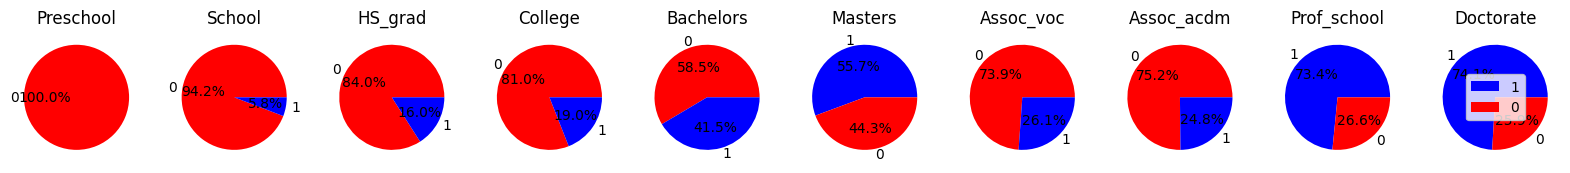

In [ ]:
# Готовим данные для графика
data1 = data[data['education'] == 'Preschool']['salary'].value_counts()
data2 = data[data['education'] == 'Doctorate']['salary'].value_counts()
data3 = data[data['education'] == 'Prof_school']['salary'].value_counts()
data4 = data[data['education'] == 'Assoc_acdm']['salary'].value_counts()
data5 = data[data['education'] == 'Assoc_voc']['salary'].value_counts()
data6 = data[data['education'] == 'Masters']['salary'].value_counts()
data7 = data[data['education'] == 'School']['salary'].value_counts()
data8 = data[data['education'] == 'Bachelors']['salary'].value_counts()
data9 = data[data['education'] == 'College']['salary'].value_counts()
data10 = data[data['education'] == 'HS_grad']['salary'].value_counts()

# Строим круговую диаграмму
fig, (ax1, ax7, ax10, ax9, ax8, ax6, ax5, ax4, ax3, ax2) = plt.subplots(nrows=1, ncols=10, figsize=(20, 10))


ax1.pie(data1.values, labels=data1.index, autopct='%1.1f%%', colors=["r"])
ax2.pie(data2.values, labels=data2.index, autopct='%1.1f%%', colors=["b", "r"])
ax3.pie(data3.values, labels=data3.index, autopct='%1.1f%%', colors=["b", "r"])
ax4.pie(data4.values, labels=data4.index, autopct='%1.1f%%', colors=["r", "b"])
ax5.pie(data5.values, labels=data5.index, autopct='%1.1f%%', colors=["r", "b"])
ax6.pie(data6.values, labels=data6.index, autopct='%1.1f%%', colors=["b", "r"])
ax7.pie(data7.values, labels=data7.index, autopct='%1.1f%%', colors=["r", "b"])
ax8.pie(data8.values, labels=data8.index, autopct='%1.1f%%', colors=["r", "b"])
ax9.pie(data9.values, labels=data9.index, autopct='%1.1f%%', colors=["r", "b"])
ax10.pie(data10.values, labels=data10.index, autopct='%1.1f%%', colors=["r", "b"])

ax1.set_title("Preschool")
ax2.set_title("Doctorate")
ax3.set_title("Prof_school")
ax4.set_title("Assoc_acdm")
ax5.set_title("Assoc_voc")
ax6.set_title("Masters")
ax7.set_title("School")
ax8.set_title("Bachelors")
ax9.set_title("College")
ax10.set_title("HS_grad")

plt.legend()

plt.show()

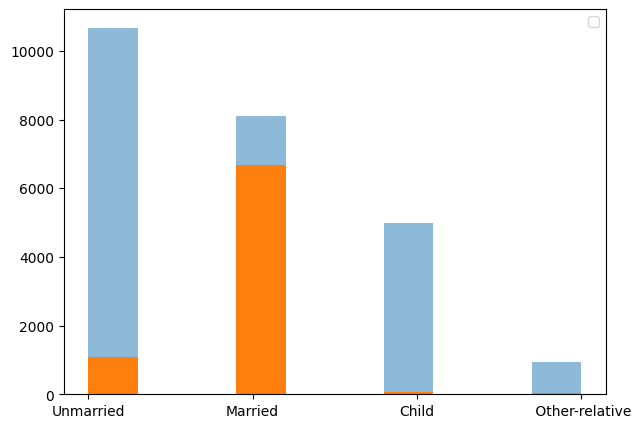

In [ ]:
plt.figure(figsize=(7, 5))

plt.hist(data['relationship'][data['salary'] == 0], alpha=0.5)
plt.hist(data['relationship'][data['salary'] == 1], alpha=1)

plt.legend()

plt.show()

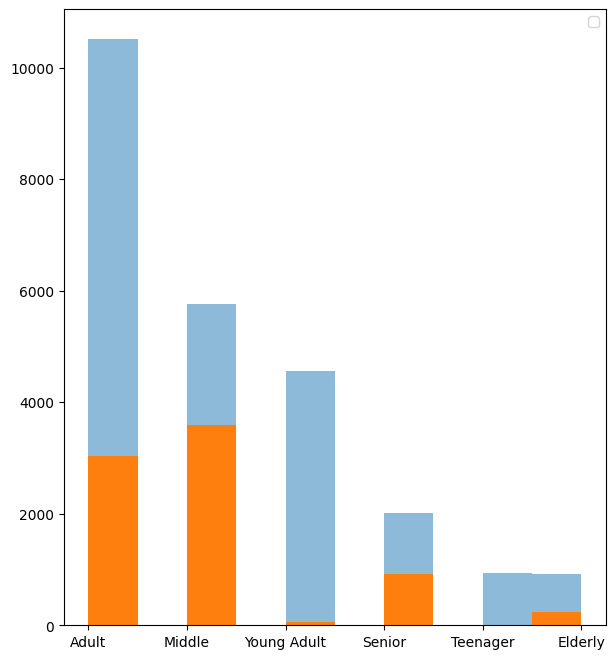

In [ ]:
plt.figure(figsize=(7, 8))

plt.hist(data['mature'][data['salary'] == 0], alpha=0.5)
plt.hist(data['mature'][data['salary'] == 1], alpha=1)

plt.legend()

plt.show()

# OHE

In [ ]:
categorical_columns = ['workclass', 'education', 'occupation', 'relationship', 'race', 'sex', 'country', 'mature']

In [ ]:
categorical_features = data[categorical_columns]

In [ ]:
unprocessed_cat_features = categorical_features.select_dtypes(include=[object]).columns.tolist()
unprocessed_cat_features

['workclass',
 'education',
 'occupation',
 'relationship',
 'race',
 'sex',
 'country',
 'mature']

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)

one_hot_encoded = encoder.fit_transform(data[unprocessed_cat_features])
one_hot_data = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(unprocessed_cat_features), index=data.index)

In [ ]:
one_hot_encoded = encoder.fit_transform(test[unprocessed_cat_features])
one_hot_test = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(unprocessed_cat_features), index=test.index)

In [ ]:
data_encoded = pd.concat([data, one_hot_data], axis=1)
data_encoded = data_encoded.drop(unprocessed_cat_features, axis=1)

In [ ]:
test_encoded = pd.concat([test, one_hot_test], axis=1)
test_encoded = test_encoded.drop(unprocessed_cat_features, axis=1)

In [ ]:
list_1 = list(data_encoded.columns)
list_2 = list(test_encoded.columns)
diff = list(set(list_1).difference(list_2))

In [ ]:
for i in diff:
  test_encoded[i] = 0

In [ ]:
data_encoded = data_encoded.reindex(sorted(data_encoded.columns), axis=1)
test_encoded = test_encoded.reindex(sorted(test_encoded.columns), axis=1)

In [ ]:
X = data_encoded.drop(columns=['salary'])
y = data_encoded['salary'].astype(int)

# Обучение моделей

In [ ]:
X_final_test = test_encoded.drop(columns=['salary'])
y_final_test = test_encoded['salary'].astype(int)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=21)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer

In [ ]:
from sklearn.model_selection import GridSearchCV

## LogisticRegression

In [ ]:
"""model = LogisticRegression(random_state = 42, solver = 'newton-cg', class_weight = 'balanced', C=1)

param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    #'class_weight': ['balanced', None],
    #'solver': ['liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}

gridsearch = GridSearchCV(model, param_grid, refit=True, scoring=make_scorer(roc_auc_score))
gridsearch.fit(X_train, y_train)
# выведем наилучшие параметры
print(gridsearch.best_params_)"""

"model = LogisticRegression(random_state = 42, solver = 'newton-cg', class_weight = 'balanced', C=1)\n\nparam_grid = {\n    'penalty': ['l1', 'l2', 'elasticnet'],\n    #'class_weight': ['balanced', None],\n    #'solver': ['liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']\n}\n\ngridsearch = GridSearchCV(model, param_grid, refit=True, scoring=make_scorer(roc_auc_score))\ngridsearch.fit(X_train, y_train)\n# выведем наилучшие параметры\nprint(gridsearch.best_params_)"

In [ ]:
logistic_regression = LogisticRegression(random_state = 42, solver = 'newton-cg',class_weight = 'balanced', C=1)
logistic_regression.fit(X_train, y_train)
y_pred = logistic_regression.predict_proba(X_test)[:,1]

In [ ]:
roc_auc = roc_auc_score(y_test, y_pred)
print("Logistic Regression ROC-AUC score on validation dataset: %.4f" % roc_auc)

Logistic Regression ROC-AUC score on validation dataset: 0.9073


In [ ]:
scores = cross_validate(LogisticRegression(random_state = 42, solver = 'newton-cg', class_weight = 'balanced', C=1), X, y, cv=10,
                        scoring={'ROC-AUC': make_scorer(roc_auc_score)},
                        return_train_score=True)

In [ ]:
print('LogisticRegression ROC-AUC Cross Validation mean = ', scores['test_ROC-AUC'].mean())

LogisticRegression ROC-AUC Cross Validation mean =  0.8221115006202838


In [ ]:
logistic_regression = LogisticRegression(random_state = 42, solver = 'newton-cg',class_weight = 'balanced', C=1)
logistic_regression.fit(X, y)
y_log_pred = logistic_regression.predict_proba(X_final_test)[:,1]

In [ ]:
roc_auc = roc_auc_score(y_final_test, y_log_pred)
print("Logistic Regression ROC-AUC score on test dataset: %.4f" % roc_auc)

Logistic Regression ROC-AUC score on test dataset: 0.9049


## SVC

In [ ]:
svc = SVC()
svc.fit(X_train, y_train)
y_svc = svc.predict(X_test)

In [ ]:
roc_auc = roc_auc_score(y_test, y_svc)
print("SVC ROC-AUC score on validation dataset: %.4f" % roc_auc)

SVC ROC-AUC score on validation dataset: 0.6284


In [ ]:
svc = SVC()
svc.fit(X, y)
y_svc_test = svc.predict(X_final_test)
roc_auc = roc_auc_score(y_final_test, y_svc_test)
print("SVC ROC-AUC score on test dataset: %.4f" % roc_auc)

SVC ROC-AUC score on test dataset: 0.6181


## DecisionTreeClassifier

In [ ]:
"""model = DecisionTreeClassifier(random_state=42, criterion = "entropy", max_depth=17, min_samples_split=9, max_leaf_nodes=6, class_weight='balanced')

param_grid = {
    #'criterion': ["gini", "entropy", "log_loss"],
    #'max_depth': [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    #'min_samples_split': [6, 7, 8, 9, 10],
    #'min_samples_leaf': [1, 2, 3, 4, 5],
    #'max_leaf_nodes': [4, 5, 6, 7, 8],
    'class_weight': ['balanced', None],
}

gridsearch = GridSearchCV(model, param_grid, refit=True, scoring=make_scorer(roc_auc_score))
gridsearch.fit(X_train, y_train)
# выведем наилучшие параметры
print(gridsearch.best_params_)"""

'model = DecisionTreeClassifier(random_state=42, criterion = "entropy", max_depth=17, min_samples_split=9, max_leaf_nodes=6, class_weight=\'balanced\')\n\nparam_grid = {\n    #\'criterion\': ["gini", "entropy", "log_loss"],\n    #\'max_depth\': [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],\n    #\'min_samples_split\': [6, 7, 8, 9, 10],\n    #\'min_samples_leaf\': [1, 2, 3, 4, 5],\n    #\'max_leaf_nodes\': [4, 5, 6, 7, 8],\n    \'class_weight\': [\'balanced\', None],\n}\n\ngridsearch = GridSearchCV(model, param_grid, refit=True, scoring=make_scorer(roc_auc_score))\ngridsearch.fit(X_train, y_train)\n# выведем наилучшие параметры\nprint(gridsearch.best_params_)'

In [ ]:
tree = DecisionTreeClassifier(random_state=42, criterion = "entropy", max_depth=17, min_samples_split=9, max_leaf_nodes=6, class_weight='balanced')
tree.fit(X_train, y_train)
y_tree = tree.predict_proba(X_test)[:,1]

In [ ]:
roc_auc = roc_auc_score(y_test, y_tree)
print("DecisionTreeClassifier ROC-AUC score on validation dataset: %.4f" % roc_auc)

DecisionTreeClassifier ROC-AUC score on validation dataset: 0.8465


In [ ]:
scores = cross_validate(DecisionTreeClassifier(random_state=42, criterion = "entropy", max_depth=17, min_samples_split=9, max_leaf_nodes=6, class_weight='balanced'), X, y, cv=5,
                        scoring={'ROC-AUC': make_scorer(roc_auc_score)})

In [ ]:
print('DecisionTreeClassifier ROC-AUC Cross Validation mean = ', scores['test_ROC-AUC'].mean())

DecisionTreeClassifier ROC-AUC Cross Validation mean =  0.7984640984844438


In [ ]:
tree = DecisionTreeClassifier(random_state=42, criterion = "entropy", max_depth=17, min_samples_split=9, max_leaf_nodes=6, class_weight='balanced')
tree.fit(X, y)
y_tree_test = tree.predict_proba(X_final_test)[:,1]
roc_auc = roc_auc_score(y_final_test, y_tree_test)
print("DecisionTreeClassifier ROC-AUC score on test dataset: %.4f" % roc_auc)

DecisionTreeClassifier ROC-AUC score on test dataset: 0.8424


## RandomForestClassifier

In [ ]:
"""model = RandomForestClassifier(random_state=42, class_weight = 'balanced', n_estimators=97, criterion='entropy', max_depth=15, min_samples_split=8, min_samples_leaf=2, max_leaf_nodes=39)

param_grid = {
    #'criterion': ["gini", "entropy", "log_loss"],
    #'max_depth': np.arange(10,20),
    #'min_samples_split': [6, 7, 8, 9, 10],
    #'min_samples_leaf': [1, 2, 3, 4, 5],
    'max_leaf_nodes': np.arange(27, 40),
    #'class_weight': ['balanced', None, 'balanced_subsample'],
    #'n_estimators': np.arange(90,100)
}

gridsearch = GridSearchCV(model, param_grid, refit=True, scoring=make_scorer(roc_auc_score))
gridsearch.fit(X_train, y_train)
# выведем наилучшие параметры
print(gridsearch.best_params_)"""

'model = RandomForestClassifier(random_state=42, class_weight = \'balanced\', n_estimators=97, criterion=\'entropy\', max_depth=15, min_samples_split=8, min_samples_leaf=2, max_leaf_nodes=39)\n\nparam_grid = {\n    #\'criterion\': ["gini", "entropy", "log_loss"],\n    #\'max_depth\': np.arange(10,20),\n    #\'min_samples_split\': [6, 7, 8, 9, 10],\n    #\'min_samples_leaf\': [1, 2, 3, 4, 5],\n    \'max_leaf_nodes\': np.arange(27, 40),\n    #\'class_weight\': [\'balanced\', None, \'balanced_subsample\'],\n    #\'n_estimators\': np.arange(90,100)\n}\n\ngridsearch = GridSearchCV(model, param_grid, refit=True, scoring=make_scorer(roc_auc_score))\ngridsearch.fit(X_train, y_train)\n# выведем наилучшие параметры\nprint(gridsearch.best_params_)'

In [ ]:
rand_forest = RandomForestClassifier(random_state=42, n_jobs=-1, class_weight = 'balanced', n_estimators=97, criterion='entropy', max_depth=15, min_samples_split=8, min_samples_leaf=2, max_leaf_nodes=39)
rand_forest.fit(X_train, y_train)
y_rand_forest = rand_forest.predict_proba(X_test)[:,1]

In [ ]:
roc_auc = roc_auc_score(y_test, y_rand_forest)
print("RandomForestClassifier ROC-AUC score on validation dataset: %.4f" % roc_auc)

RandomForestClassifier ROC-AUC score on validation dataset: 0.9082


In [ ]:
scores = cross_validate(RandomForestClassifier(random_state=42, class_weight = 'balanced', n_estimators=97, criterion='entropy', max_depth=15, min_samples_split=8, min_samples_leaf=2, max_leaf_nodes=39), X, y, cv=5,
                        scoring={'ROC-AUC': make_scorer(roc_auc_score)})

In [ ]:
print('RandomForestClassifier ROC-AUC Cross Validation mean = ', scores['test_ROC-AUC'].mean())

RandomForestClassifier ROC-AUC Cross Validation mean =  0.8180172621778482


In [ ]:
rand_forest = RandomForestClassifier(random_state=42, class_weight = 'balanced', n_estimators=97, criterion='entropy', max_depth=15, min_samples_split=8, min_samples_leaf=2, max_leaf_nodes=39)
rand_forest.fit(X, y)
y_rand_forest_test = rand_forest.predict_proba(X_final_test)[:,1]
roc_auc = roc_auc_score(y_final_test, y_rand_forest_test)
print("RandomForestClassifier ROC-AUC score on test dataset: %.4f" % roc_auc)

RandomForestClassifier ROC-AUC score on test dataset: 0.9062
